In [2]:
import numpy as np
import matplotlib
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



2024-07-05 12:57:09.556539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestRegressor

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.0,
    max_depth=1, random_state=0)
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=1.0, max_depth=1, n_estimators=1000,
                          random_state=0)

In [5]:
res = model.predict(X_test)
print(res)

[-3.4944869  15.82793537  9.30892151  1.45561271 11.51069086 19.55231373
 11.86742956 11.43089265 10.7308532  13.9244249  -8.49169587 26.10628633
 -3.88812744 33.67956221  3.56620063 48.73027828 -1.78067935 29.3748457
  2.96163483 36.25981155 -2.22818893 44.01390639 -3.75258152 13.96675092
  0.96067909  3.65544692 49.79160574 21.6744884  46.77330681  0.15830512
  9.04431458 33.15753968  8.30375966 44.47930243 15.81341268 51.30078723
  2.71202313 13.04686104 32.42930247  6.06538887 53.33771437 26.11444596
 83.75971239 17.99895165 19.47904604 16.22011319  9.17153229 50.04027444
 47.04661266 75.65094554 23.58533954  9.34319823 15.30606245 14.409175
 16.81257466 33.17157663 30.49947778 16.08763063 12.93618478 27.23818184
  7.77922996 42.53386491 13.1501636  41.8175525  26.65801623 11.94457632
 16.49698594  7.62387849 35.7896509  26.98700685 17.00611059 29.42375904
  6.64881013 21.31040676  3.34019576 37.5934735  25.91329023 32.76519184
 23.2694191  19.41047912 23.12338864  1.99316752  9.29

In [6]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)


0.6798734035677279
7.813698339777319
0.670538048928842
10.356554094912939


In [7]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


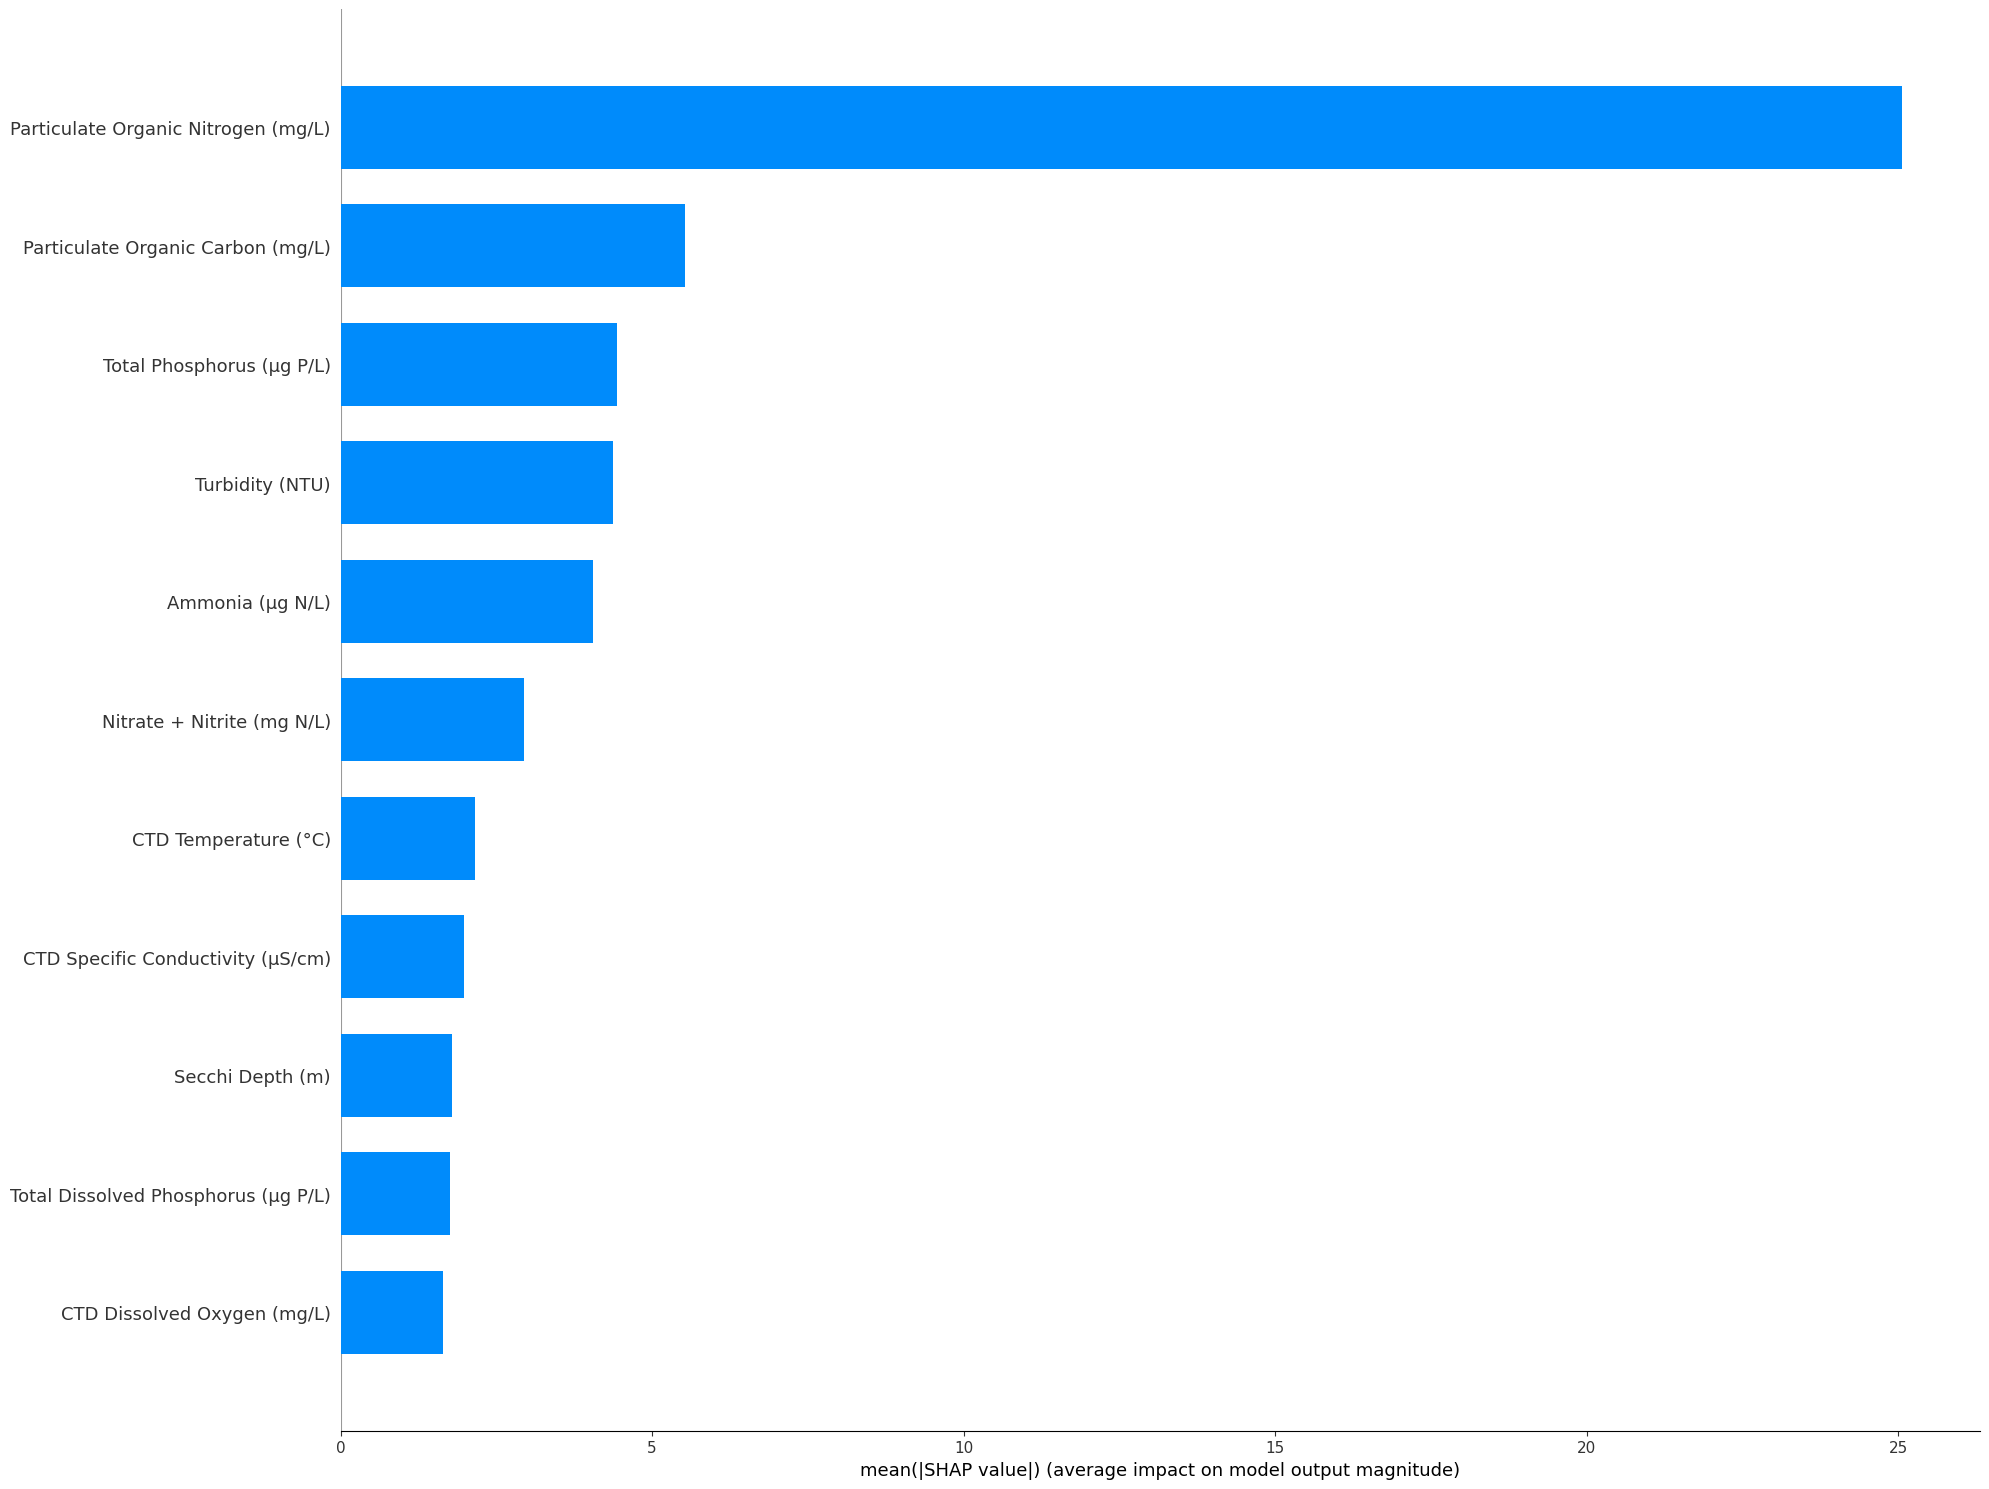

In [8]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
import matplotlib.pyplot as plt 
shap.summary_plot(shap_values, X_train,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


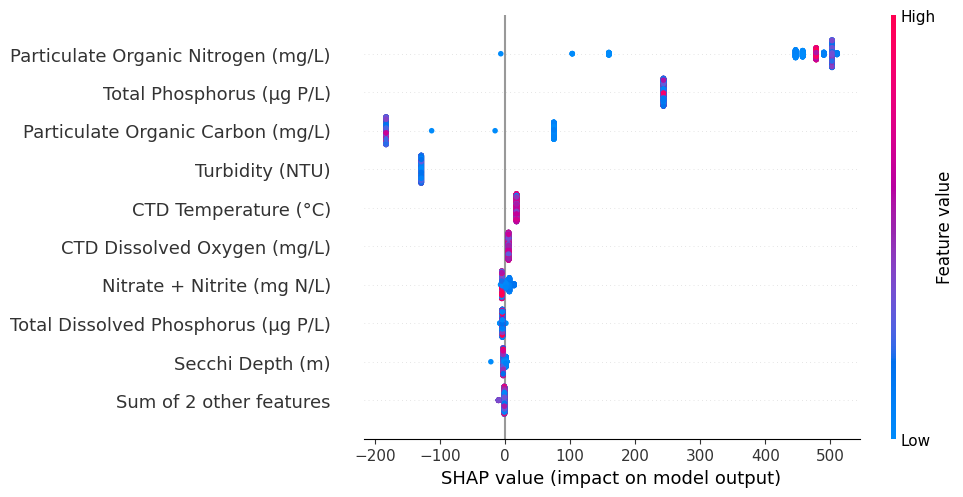

In [9]:
X_test_shap = pd.DataFrame(train.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

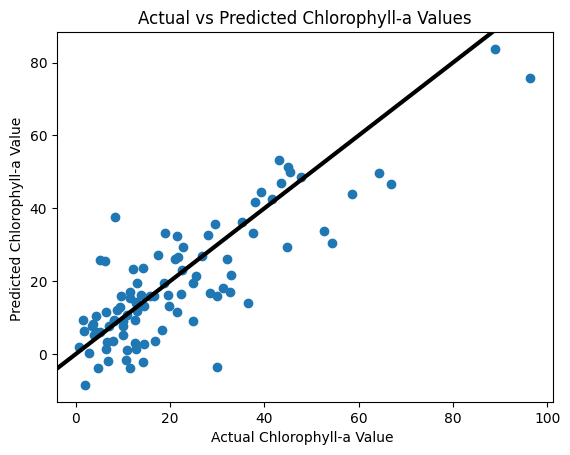

In [10]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()